In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import os

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility
cur_dir = os.getcwd()
ckpt_dir = 'checkpoints'

In [2]:
mnist = input_data.read_data_sets("../data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

Extracting ../data/train-images-idx3-ubyte.gz
Extracting ../data/train-labels-idx1-ubyte.gz
Extracting ../data/t10k-images-idx3-ubyte.gz
Extracting ../data/t10k-labels-idx1-ubyte.gz


In [3]:
saver = tf.train.import_meta_graph(os.path.join(cur_dir, ckpt_dir, 'mnist_save.ckpt.meta'))

In [4]:
# initialize
sess = tf.Session(config=tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth =True)))
#sess.run(tf.global_variables_initializer())

In [5]:
cur_dir = os.getcwd()
saver.restore(sess, os.path.join(cur_dir, ckpt_dir, 'mnist_save.ckpt'))

INFO:tensorflow:Restoring parameters from c:\Work\FC_TF_course\checkpoints\mnist_save.ckpt


In [6]:
X = tf.get_collection('train_var')[0]
Y = tf.get_collection('train_var')[1]
is_train = tf.get_collection('train_var')[2]
logits = tf.get_collection('train_var')[3]
accuracy = tf.get_collection('train_var')[4]

In [7]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_sample, y_sample, batch_size=100):
    """Run a minibatch accuracy op"""

    N = X_sample.shape[0]
    correct_sample = 0

    for i in range(0, N, batch_size):
        X_batch = X_sample[i: i + batch_size]
        y_batch = y_sample[i: i + batch_size]
        N_batch = X_batch.shape[0]

        feed = {
            X: X_batch,
            Y: y_batch,
            is_train: False
        }

        correct_sample += sess.run(accuracy, feed_dict=feed) * N_batch

    return correct_sample / N

print("\nAccuracy Evaluates")
print("-------------------------------")
print('Train Accuracy:', '{:.5f}'.format(evaluate(mnist.train.images, mnist.train.labels)))
print('Test Accuracy:', '{:.5f}'.format(evaluate(mnist.test.images, mnist.test.labels)))


Accuracy Evaluates
-------------------------------
Train Accuracy: 0.99787
Test Accuracy: 0.99320


In [8]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1], is_train: False}))
    #tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1.}))

Label:  [3]
Prediction:  [3]


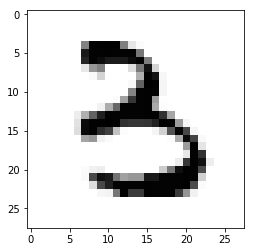

In [9]:
plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()